In [1]:
import psycopg2
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pytz
import pandas_ta as ta
import plotly.express as px
import plotly.graph_objects as go
import itertools
import random
from da_controller import *
from strategies import *
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from typing import Dict, List, Any
from optimizers import GeneticOptimizer, GridSearchOptimizer

controllers_path = os.path.abspath("../historic_updater")
sys.path.append(controllers_path)
from controllers import *

# READ DF
data_path = os.path.abspath("../data")
sys.path.append(data_path)
file_name = 'BTCUSDT_futures_1h_2020-01-01_2025-02-18.csv'
data_filepath = os.path.join(data_path, file_name)
df = pd.read_csv(data_filepath)
df = format_df(df)
df = df.reset_index(drop=True)
strategy = EMAcross_strategy

In [2]:
# Genetic optimization
# Input values
short_EMA_range = range(3, 20, 10)
long_EMA_range = range(4, 1000, 10)



key_range = {
    'short_EMA': long_EMA_range,
    'long_EMA': long_EMA_range
}

def fitness_function(population):
    fitness_values = []
    for individual in population:
        result = true_backtest(df, strategy, trade_comission=0.001,**individual)
        fitness_values.append(result)
    return fitness_values


# Grid search implementation
optimizer = GeneticOptimizer(
    parameter_ranges=key_range,
    population_size=50,
    elite_size=5,
    mutation_rate=0.2,
    tournament_size=3
)

best_params, best_fitness, fitness_history, diversity_history = optimizer.optimize(
    fitness_function=lambda pop: fitness_function(pop),
    n_generations=50,
    min_diversity=0.4
)

print(f"\nBest parameters: {best_params}")

Restarting population at generation 113 - Diversity: 0.42
Restarting population at generation 362 - Diversity: 0.40
Restarting population at generation 576 - Diversity: 0.41
Restarting population at generation 776 - Diversity: 0.42
Restarting population at generation 876 - Diversity: 0.31
Restarting population at generation 976 - Diversity: 0.39
Restarting population at generation 1176 - Diversity: 0.40
Restarting population at generation 1276 - Diversity: 0.29
Restarting population at generation 1376 - Diversity: 0.35
Restarting population at generation 1476 - Diversity: 0.38
Restarting population at generation 1576 - Diversity: 0.40
Restarting population at generation 1676 - Diversity: 0.36
Restarting population at generation 1776 - Diversity: 0.40
Restarting population at generation 1876 - Diversity: 0.35
Restarting population at generation 1976 - Diversity: 0.40
Restarting population at generation 2076 - Diversity: 0.35
Restarting population at generation 2176 - Diversity: 0.38
Res

Final funds: 1940.759774704082
Total trades: 128
Win trades: 25
Lose trades: 103
Max trade rate: 2.8526607265451207
Min trade rate: 0.9403720234342823
Max win streak: 2
Max lose streak: 11
Max drawdown: 89.48929367170966


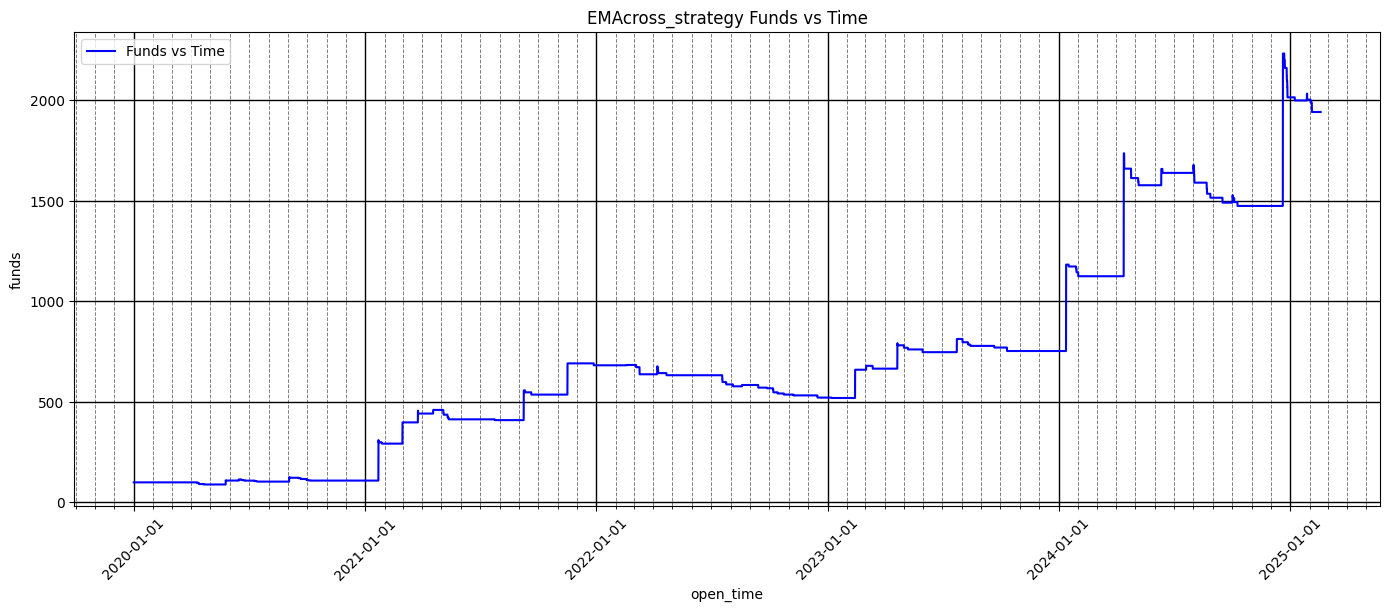

In [3]:
values = best_params
detailed_true_backtest(df, strategy, **values)

In [4]:
plot_strategy_signals(df, strategy,**best_params)

Final funds: 765.8939283920329
Total trades: 86
Win trades: 26
Lose trades: 60
Max trade rate: 1.8277304164332226
Min trade rate: 0.8990632082136729
Max win streak: 4
Max lose streak: 8
Max drawdown: 91.85795412271553


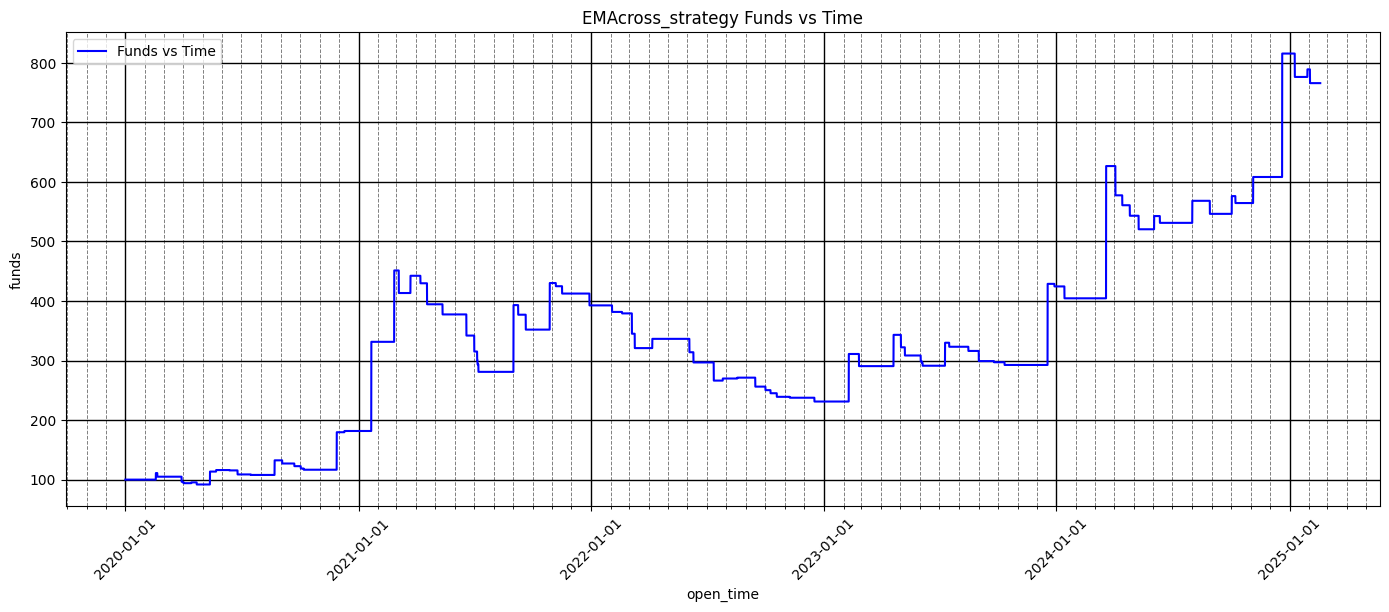

In [7]:
values = {   
    'short_EMA': 80,
    'long_EMA': 280,
    }
detailed_true_backtest(df, strategy, **values)

In [8]:
plot_strategy_signals(df, strategy,**values)

Final funds: 1330.9830187346527
Total trades: 1
Win trades: 1
Lose trades: 0
Max trade rate: 13.309830187346527
Min trade rate: 1
Max win streak: 1
Max lose streak: 0
Max drawdown: 100


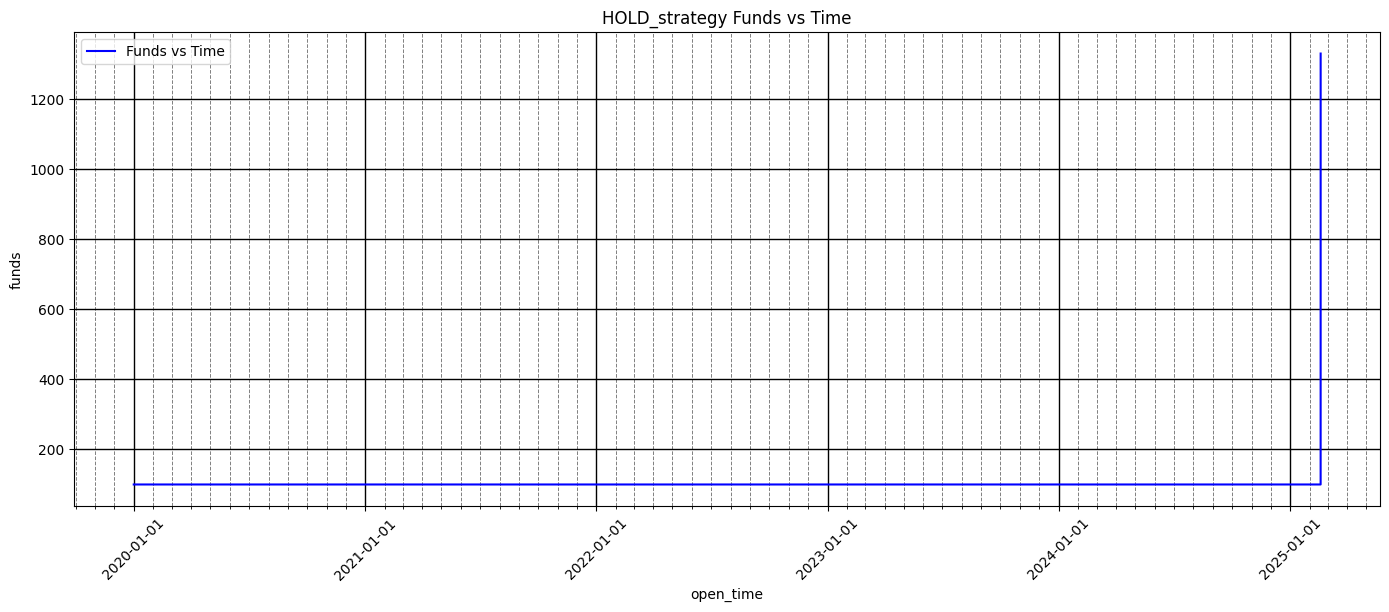

In [5]:
values = {}
detailed_backtest(df, HOLD_strategy, **values)